# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
#from scipy.stats import linregress
import json

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Import API key
from api_keys import weather_api_key

# under VBA add this line to .iginore to gnore the push/ modification of the config.py file
# api_keys.py

In [3]:
# Output File CSV
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations-- numpy, generate 1500 lats, lngs a piece
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [5]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# the url info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [7]:
# url Query build
Q_url = f"{url}appid={weather_api_key}&units={units}&q="
## url = f"http://api.openweathermap.org/data/2.5/weather?units-imperial&APPID={weather_api_key}"

In [8]:
# Get city weather data
weather_response = requests.get(Q_url + city)
weather_json = weather_response.json()
# converts a Python object into a json string-- dumps
print(json.dumps(weather_json, indent=6))
#print(weather_json)

{
      "coord": {
            "lon": -155.09,
            "lat": 19.7297
      },
      "weather": [
            {
                  "id": 800,
                  "main": "Clear",
                  "description": "clear sky",
                  "icon": "01d"
            }
      ],
      "base": "stations",
      "main": {
            "temp": 19.42,
            "feels_like": 19.53,
            "temp_min": 18.78,
            "temp_max": 19.66,
            "pressure": 1016,
            "humidity": 81
      },
      "visibility": 10000,
      "wind": {
            "speed": 1.79,
            "deg": 273,
            "gust": 4.47
      },
      "clouds": {
            "all": 2
      },
      "dt": 1644948098,
      "sys": {
            "type": 2,
            "id": 2002460,
            "country": "US",
            "sunrise": 1644943757,
            "sunset": 1644985195
      },
      "timezone": -36000,
      "id": 5855927,
      "name": "Hilo",
      "cod": 200
}


In [9]:
# set empty for list of variables
city_name = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# start record counting
processing_record = 1 

# check if responsw correct
print(weather_response)
#print(cities)

<Response [200]>


In [10]:
# data retrive process start

# print to logger
print(f"Beginning Data Retrieval      ")
print(f"------------------------------")

# Loop through each city
for city in cities:
    
    # try to get the response for each city
    try:
        #run API requests and retrive the data
        response = requests.get(Q_url + city).json()
        
        ## add a time delay to avoid blowing out the API key
        #time.sleep(1)
        
        city_name.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        temperature.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # increase record counting by 1
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    pass

print(f"------------------------------")
print(f"Data Retrieval Complete!!    ")
print(f"------------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 | Nānākuli
Processing Record 2 | Pevek
Processing Record 3 | Rikitea
Processing Record 4 | Gazli
Processing Record 5 | Kapaa
Processing Record 6 | Beringovskiy
Processing Record 7 | High Level
Processing Record 8 | Cabo San Lucas
Processing Record 9 | Indianola
Processing Record 10 | Butaritari
Processing Record 11 | Jamestown
Processing Record 12 | ‘Ewa Beach
Processing Record 13 | Airai
Processing Record 14 | Czarnków
Processing Record 15 | Opuwo
City not found. Skipping...
City not found. Skipping...
Processing Record 16 | Buraidah
City not found. Skipping...
Processing Record 17 | Kaitangata
Processing Record 18 | New Norfolk
Processing Record 19 | Bredasdorp
Processing Record 20 | Mosetse
Processing Record 21 | Hilo
Processing Record 22 | Ushuaia
Processing Record 23 | Bathsheba
Processing Record 24 | Port Alfred
Processing Record 25 | Kupang
Processing Record 26 | Albany
Processing Record 27 | Banda

Processing Record 229 | Cap-aux-Meules
Processing Record 230 | Torbay
Processing Record 231 | Rudnichnyy
Processing Record 232 | Kuril'sk
Processing Record 233 | Lake Havasu City
Processing Record 234 | Castro
Processing Record 235 | Nuuk
Processing Record 236 | Tautira
Processing Record 237 | Cayenne
Processing Record 238 | Japura
Processing Record 239 | Inhambane
Processing Record 240 | Hasaki
Processing Record 241 | Beloha
Processing Record 242 | Mpophomeni
Processing Record 243 | Maragogi
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 244 | Farafenni
Processing Record 245 | Ankazoabo
City not found. Skipping...
Processing Record 246 | Fairbanks
Processing Record 247 | Morgan City
Processing Record 248 | Camacha
Processing Record 249 | Shenjiamen
Processing Record 250 | Diego de Almagro
Processing Record 251 | Waipawa
Processing Record 252 | Lavrentiya
Processing Record 253 | Carauari
Processing Record 254 | Biak
Processing Reco

Processing Record 453 | Yangi Marg`ilon
Processing Record 454 | Laï
Processing Record 455 | Margate
City not found. Skipping...
Processing Record 456 | Niigata
City not found. Skipping...
Processing Record 457 | Victor Harbor
Processing Record 458 | Sobolevo
Processing Record 459 | Mount Gambier
Processing Record 460 | Numan
Processing Record 461 | Basco
Processing Record 462 | Kristoni
City not found. Skipping...
Processing Record 463 | Buta
Processing Record 464 | Barra de Tecoanapa
Processing Record 465 | Souillac
Processing Record 466 | Aksarayskiy
Processing Record 467 | Pakxan
Processing Record 468 | Saint Anthony
Processing Record 469 | Padang
Processing Record 470 | Morondava
City not found. Skipping...
Processing Record 471 | Zelenogorskiy
Processing Record 472 | Ilhabela
Processing Record 473 | Olinda
City not found. Skipping...
Processing Record 474 | Boa Vista
City not found. Skipping...
Processing Record 475 | Juradó
Processing Record 476 | Pauini
Processing Record 477 | C

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# define dataframe then display
weather_data = {
    "City": city_name,
    "Latitude": latitude,
    "Longitude": longitude,
    "Temp": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weatherDF = pd.DataFrame(weather_data)

weatherDF.head()

,City,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nānākuli,21.3906,-158.1547,18.53,88,40,1.54,US,1644948098
1,Pevek,69.7008,170.3133,-30.13,99,100,1.76,RU,1644948099
2,Rikitea,-23.1203,-134.9692,25.52,65,37,2.41,PF,1644947808
3,Gazli,40.1333,63.4500,1.35,53,50,5.13,UZ,1644948099
4,Kapaa,22.0752,-159.3190,20.66,99,78,2.75,US,1644948099


In [12]:
# export data to CSV file
weatherDF.to_csv("Weather_Output.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Date
# count	550.000000	550.000000	550.000000	550.000000	550.000000	550.000000	5.500000e+02

In [14]:
# Get the indices of cities that have humidity over 100%.
# Int64Index([], dtype='int64')

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
# 0	butaritari	3.07	172.79	83.32	74	84	10.42	KI	1593605283

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [16]:
## Create a series of scatter plots to showcase the following relationships:
#  Temperature (F) vs. Latitude
#  Humidity (%) vs. Latitude
#  Cloudiness (%) vs. Latitude
#  Wind Speed (mph) vs. Latitude

In [17]:
## Save plot to the selected directory. If the directory does not exist, it is created.

#import os
#import matplotlib.pyplot as plt

#script_dir = os.path.dirname(__file__)
#results_dir = os.path.join(script_dir, 'Results/')
#plot_file_name = "CityLatitude_vs_Temperature"

#if not os.path.isdir(results_dir):
#    os.makedirs(results_dir)

#plt.plot([1,2,3,4])
#plt.ylabel('some numbers')
#plt.savefig(results_dir + sample_file_name)

## Latitude vs. Temperature Plot

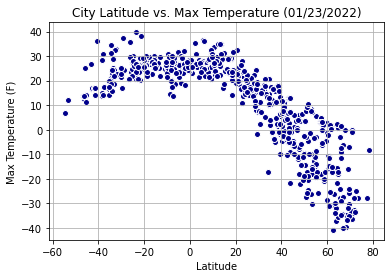

The relationship between City Latitude and Temperature shows as the scatter plot above. 

All latitude lines are parallel from East to West as circles to the equator, 
Temperature is inversely related to latitude.  
As latitude increases, the temperature falls, and vice versa. 



<Figure size 432x288 with 0 Axes>

In [18]:
# Create a scatter plot for Temperature (F) vs. Latitude
plt.scatter(weatherDF['Latitude'], weatherDF["Temp"], facecolors = "darkblue", edgecolor ="white", marker="o")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (01/23/2022)")

plt.grid()
plt.show()

# bold print '\033[1m'+ words +'\033[0m'
print('\033[1m' +"The relationship between City Latitude and Temperature shows as the scatter plot above. \n" 
      "\n"
      "All latitude lines are parallel from East to West as circles to the equator, \n"
      "Temperature is inversely related to latitude.  \n"
      "As latitude increases, the temperature falls, and vice versa. \n"+'\033[0m')

# save plot as png file
plt.savefig("CityLatitude_vs_Temp.png")

## Latitude vs. Humidity Plot

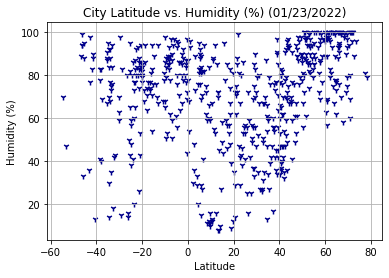

The relationship between City Latitude and Humidity shows as the scatter plot above. 
Since the humidity also meansures water vapor in the air, warm air can possess more water vapor (moisture)
then cold air, air will have a higher relative humidity if the air is cooler. The cities with higer Latitude 
will be moisture with the same amount of absolute/specific humidity, then the cities with lower latitude.



<Figure size 432x288 with 0 Axes>

In [19]:
# Create a scatter plot for Humidity (%) vs. Latitude

plt.scatter(weatherDF["Latitude"], weatherDF["Humidity"], facecolors = "darkblue", edgecolor ="white", marker="1")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%) (01/23/2022)")

plt.grid()
plt.show()

# bold print '\033[1m'+ words +'\033[0m'
print('\033[1m' +"The relationship between City Latitude and Humidity shows as the scatter plot above. \n" 
      "Since the humidity also meansures water vapor in the air, warm air can possess more water vapor (moisture)\n"
      "then cold air, air will have a higher relative humidity if the air is cooler. The cities with higer Latitude \n"
      "will be moisture with the same amount of absolute/specific humidity, then the cities with lower latitude.\n"
      +'\033[0m')

# save plot as png file
plt.savefig("CityLatitude_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

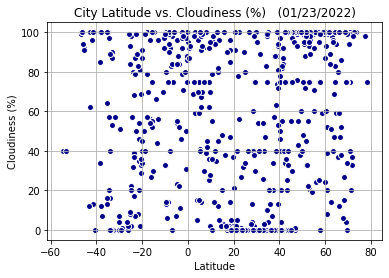

The relationship between City Latitude and Cloudiness (%) shows as the scatter plot above. 
Clouds tend to form in abundance in the middle latitudes to north and south of the equator.
There are three broad bands where Earth’s skies are most likely to be cloudy. 



<Figure size 432x288 with 0 Axes>

In [20]:
# Create a scatter plot for Cloudiness (%) vs. Latitude

plt.scatter(weatherDF["Latitude"], weatherDF["Cloudiness"], facecolors = "darkblue", edgecolor ="white", marker="o")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%)   (01/23/2022)")

plt.grid()
plt.show()

# bold print '\033[1m'+ words +'\033[0m'
print('\033[1m' +
      "The relationship between City Latitude and Cloudiness (%) shows as the scatter plot above. \n" 
      "Clouds tend to form in abundance in the middle latitudes to north and south of the equator.\n"
      "There are three broad bands where Earth’s skies are most likely to be cloudy. \n"
      +'\033[0m')

# save plot as png file
plt.savefig("CityLatitude_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

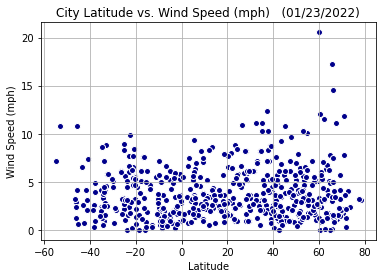

The relationship between City Latitude and Wind Speed (mph) shows as the scatter plot above. 
the speed of wind is determined by the magnitude of the air pressure difference make the air move 
from high pressure to low.  with greater speeds resulting from greater air pressure differences.
Observations show that the wind speed increases equatorward in low latitudes while the wind speed decreases. 



<Figure size 432x288 with 0 Axes>

In [21]:
#Create a scatter plot for Wind Speed (mph) vs. Latitude

plt.scatter(weatherDF["Latitude"], weatherDF["Wind Speed"], facecolors = "darkblue", edgecolor ="white", marker="o")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (mph)   (01/23/2022)")

plt.grid()
plt.show()

# bold print '\033[1m'+ words +'\033[0m'
print('\033[1m' +
      "The relationship between City Latitude and Wind Speed (mph) shows as the scatter plot above. \n" 
      "the speed of wind is determined by the magnitude of the air pressure difference make the air move \n"
      "from high pressure to low.  with greater speeds resulting from greater air pressure differences.\n"
      "Observations show that the wind speed increases equatorward in low latitudes while the wind speed decreases. \n"
      +'\033[0m')

# save plot as png file
plt.savefig("CityLatitude_vs_WindSpeed.png")

## Linear Regression

In [22]:
# Separate the plots into Northern Hemisphere (>=0 degrees latitude) and Southern Hemisphere (<0 degrees latitude):

#Northern Hemisphere - Temperature (F) vs. Latitude
#Southern Hemisphere - Temperature (F) vs. Latitude
#Northern Hemisphere - Humidity (%) vs. Latitude
#Southern Hemisphere - Humidity (%) vs. Latitude
#Northern Hemisphere - Cloudiness (%) vs. Latitude
#Southern Hemisphere - Cloudiness (%) vs. Latitude
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
#Southern Hemisphere - Wind Speed (mph) vs. Latitude

# explain what the linear regression is modeling. Describe any relationships and any other analysis

#final notebook must:
# Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
# Perform a weather check on each of the cities using a series of successive API calls.
# Include a print log of each city as it's being processed with the city number and city name.
# Save a CSV of all retrieved data and a PNG image for each scatter plot.

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

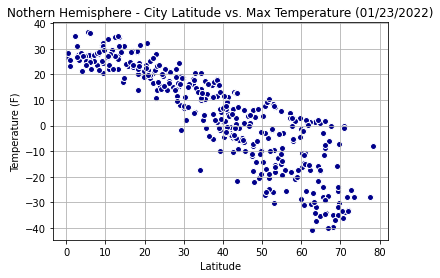

In [23]:
# create dataframe for northern hemisphere
N_hemisphere = weatherDF.loc[weatherDF["Latitude"] >= 0]

# Create a scatter plot for latitude vs temperature for northern hemisphere
x_values = N_hemisphere["Latitude"]
y_values = N_hemisphere["Temp"]
plt.scatter(x_values, y_values, facecolors="darkblue", marker="o", edgecolor="white")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title("Nothern Hemisphere - City Latitude vs. Max Temperature (01/23/2022)")

plt.grid()
plt.show()

In [24]:
# Perform a linear regression on Max temperature vs. latitude for Northern hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# caculate regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      18.442781
1     -21.202453
3       3.061790
4      17.880971
5     -15.744547
         ...    
552    -7.606517
554     0.736510
555     5.252650
557    31.871553
558     6.280829
Name: Latitude, Length: 382, dtype: float64


In [25]:
# result of line equation string
line_equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_equation)

y = -0.82x +36.0


The r-value is: 0.7635918939849446


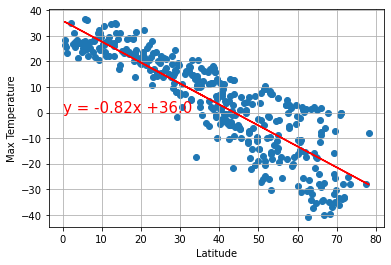

In [26]:
# Create plot for Northern hemisphere
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

#plt.text(1,1,line_equation, color='red')
plt.annotate(line_equation,(0,0),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.grid()
plt.show()

In [27]:
# save plot as png file
plt.savefig("N_hemisphere_CityLatitude_vs_Temp.png")

<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

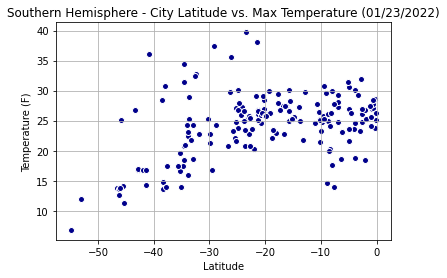

In [31]:
# create dataframe for Southern Hemisphere
S_hemisphere = weatherDF.loc[weatherDF["Latitude"] < 0]

# Create a scatter plot for latitude vs temperature for northern hemisphere
x_values = S_hemisphere["Latitude"]
y_values = S_hemisphere["Temp"]
plt.scatter(x_values, y_values, facecolors="darkblue", marker="o", edgecolor="white")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title("Southern Hemisphere - City Latitude vs. Max Temperature (01/23/2022)")

plt.grid()
plt.show()

In [32]:
# Perform a linear regression on Max temperature vs. latitude for Southern hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# caculate regression values
regress_values = x_values * slope + intercept
print(regress_values)

2      23.885089
12     26.219084
14     24.717084
16     20.076456
17     20.651843
         ...    
547    26.314722
548    27.147966
550    26.663793
553    26.021067
556    23.304982
Name: Latitude, Length: 177, dtype: float64


In [33]:
# result of line equation string
line_equation1 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_equation1)

y = 0.16x +27.69


The r-value is: 0.167609862153314


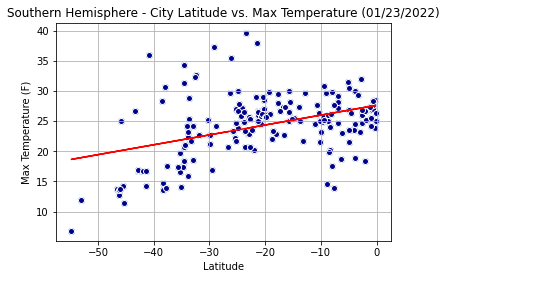

<Figure size 432x288 with 0 Axes>

In [39]:
# Create plot for Southern Hemisphere
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Tempe")

plt.scatter(x_values, y_values, facecolors="darkblue", marker="o", edgecolor="white")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("Southern Hemisphere - City Latitude vs. Max Temperature (01/23/2022)")

#plt.text(0,0,line_equation1, color='red')
plt.annotate({line_equation1},(0,0),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.grid()
plt.show()

# save plot as png file
plt.savefig("S_Hemi_CityLatitude_vs_MaxTemp_LinearReg")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression